In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
from sklearn.datasets import make_classification

In [36]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

In [37]:
X

array([[ 2.0854464 ,  1.58412483],
       [ 0.82191672, -1.23110165],
       [ 1.15129947, -1.21685067],
       ...,
       [-0.90663905, -0.61164214],
       [-1.21674064,  1.36491955],
       [ 2.08962559,  2.0674807 ]])

In [38]:
y

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [39]:
pd.DataFrame(X)[0]

0      2.085446
1      0.821917
2      1.151299
3     -0.166041
4      0.694889
         ...   
995   -1.625536
996    0.974425
997   -0.906639
998   -1.216741
999    2.089626
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

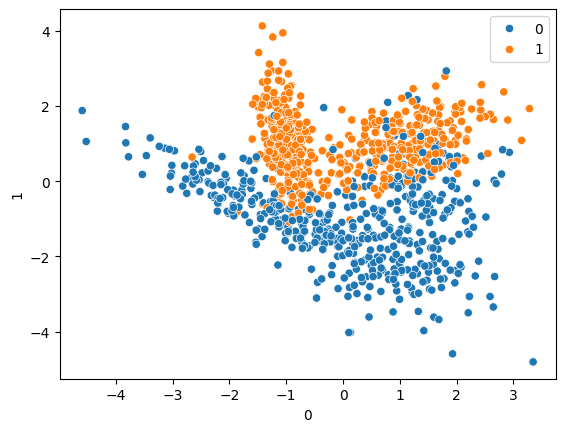

In [40]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)

In [42]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

In [43]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
y_pred = svc.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       119
           1       0.85      0.89      0.87       131

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



In [46]:
rbf = SVC(kernel='rbf')

rbf.fit(X_train, y_train)

y_pred = rbf.predict(X_test)


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       119
           1       0.88      0.98      0.92       131

    accuracy                           0.92       250
   macro avg       0.92      0.91      0.92       250
weighted avg       0.92      0.92      0.92       250



In [48]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)

y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.93      0.76      0.83       119
           1       0.81      0.95      0.87       131

    accuracy                           0.86       250
   macro avg       0.87      0.85      0.85       250
weighted avg       0.87      0.86      0.85       250



HyperParameter Tuning with SVC

In [51]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [52]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, cv = 4)

grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [53]:
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       119
           1       0.87      0.98      0.92       131

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250

